In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#import seaborn as sns

In [2]:
coplay = pd.read_csv("/mnt/data/ds_data/SHARED_RESOURCES/NETWORK_DATA_YEARS/Grouped_Jan2017-Feb2019.csv")
coplay_file = coplay.groupby(['SPA1','SPA2'])['BATTLE_CNT'].sum().reset_index()
coplay_agg1 = coplay_file.groupby(['SPA1']).agg({"SPA2": "count"}).reset_index()
coplay_agg2 = coplay_file.groupby(['SPA2']).agg({"SPA1": "count"}).reset_index()
coplay_agg1.columns = ['SPA', 'Coplay_count'] 
coplay_agg2.columns = ['SPA', 'Coplay_count'] 
coplay_data = pd.concat([coplay_agg1, coplay_agg2]).groupby(["SPA"], as_index=False)["Coplay_count"].sum()

In [3]:
coplay_data.head()

,SPA,Coplay_count
0,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,66
1,00003C737E6C04AB485320F2EE39F3DEF153CA065B303F...,2
2,000057AAF844EE943845732F1E2C512BF0B26DBB2B70BD...,3
3,00008E03280B09D31452D8A5BACD54B565394A283EB34C...,41
4,0000BC1E957A5DE86D6742F0304DD12F6C5B53BEE1A67B...,5


In [4]:
coplay_edgelist = coplay_file.drop('BATTLE_CNT', axis =1)
coplay_edgelist = coplay_edgelist.drop_duplicates()
G = nx.from_pandas_edgelist(coplay_edgelist,'SPA1','SPA2')

In [5]:
twinks_file = pd.read_csv("/mnt/data/ds_data/SHARED_RESOURCES/TWINK_DATA/twinks_new.csv")
twink_edgelist = twinks_file.iloc[:,[1,3]]
twink_edgelist = twink_edgelist.drop_duplicates()
G_twink = nx.from_pandas_edgelist(twink_edgelist,'PARENT_SPA_KEY','CHILD_SPA_KEY')

In [6]:
twink_edgelist.head()

,PARENT_SPA_KEY,CHILD_SPA_KEY
0,658CDFD65103B78226828BA1EF405150A3615CF13DE410...,55250E954219DDB757D7FBD9AFB6FBB249EFAF69E9DE4A...
1,75CEA7828759FE157E838A4E8EE64190876AC50257825B...,35FE10DE6F56666254FC45D7B86D3793780723F68F53B6...
2,50B6FBDF2EEAA03BFC48BCBEF2E9AF55E12B87808C8213...,3C9B848EDF94730F264F5154DC3DEEE52315DC654F9381...
3,918AB7B7929DEBA24B8996D4D8B52D8532C6A0FC77FDAC...,22F853DC155D2F35D5EC495FE8254CE27356D75105604A...
4,305E76BA82F34E1E987839FFD856112C4F6FB3F2B514F7...,2B6E46A6F6A46F7145A3E08A7D00CDB038F3DA1FC7D9B3...


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


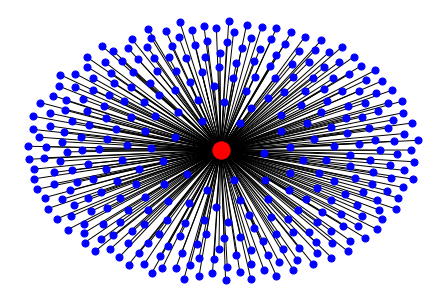

In [7]:
from operator import itemgetter

# find node with largest degree
node_and_degree = G_twink.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-3]
twink_ego = nx.ego_graph(G_twink, largest_hub)
# Draw graph
twink_pos = nx.spring_layout(twink_ego)
nx.draw(twink_ego, twink_pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(twink_ego, twink_pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

In [8]:
largest_hub

'C402AA603D353325E0B4A4B54F93505AACFDFBBF7455023B382FF95B7DFB0BA3'

In [9]:
coplay_spa = coplay_data.drop('Coplay_count', axis=1)
twink_commoncoplay = twink_edgelist.merge(coplay_spa, left_on='PARENT_SPA_KEY', right_on='SPA')
twink_commoncoplay = twink_commoncoplay.drop('SPA',axis=1)
twink_commoncoplay = twink_commoncoplay.merge(coplay_spa, left_on='CHILD_SPA_KEY', right_on='SPA')
twink_commoncoplay = twink_commoncoplay.drop('SPA',axis=1)

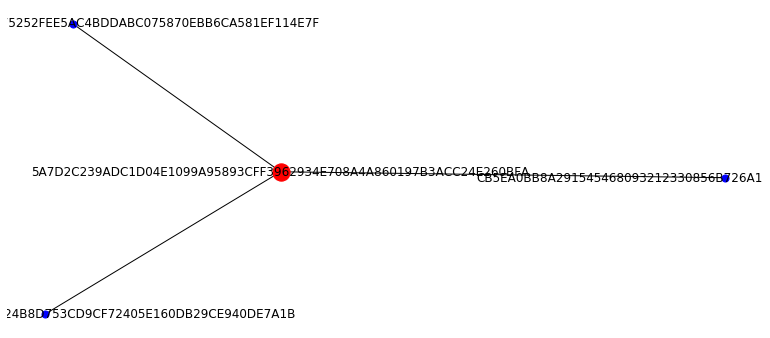

In [10]:
import matplotlib
G_twinkcoplay = nx.from_pandas_edgelist(twink_commoncoplay,'PARENT_SPA_KEY','CHILD_SPA_KEY')
# find node with largest degree
node_and_degree = G_twinkcoplay.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-220]
twink_ego = nx.ego_graph(G_twinkcoplay, largest_hub)
# Draw graph
twink_pos = nx.spring_layout(twink_ego)
nx.draw(twink_ego, twink_pos, node_color='b', node_size=50, with_labels=True)
# Draw ego as large and red
nx.draw_networkx_nodes(twink_ego, twink_pos, nodelist=[largest_hub], node_size=300, node_color='r')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 4.5,forward=True)
plt.show()

In [11]:
largest_hub_ego = list(twink_ego)

In [12]:
#new df based on twink ego n/w
some_values = list(twink_ego)
new_coplay = coplay_edgelist.loc[coplay_edgelist['SPA1'].isin(some_values) | coplay_edgelist['SPA2'].isin(some_values) ]


In [13]:
nodes_coplay = []
for spa in largest_hub_ego:
    ego_graph_list = nx.ego_graph(G, spa)
    nodes_coplay.append(list(ego_graph_list))
    

In [14]:
nodes_coplay

[['31672725863ECC793180E50D7625E1CD77D957BD5CFE751E4B24622FFEB4A16E',
  '3AF4DB12411DCC773E08D9177586552A277A5B51AC41197FE88BA1BE80FDFCCC',
  '6D2EFC619465A68F7011BEF062BB400837847C619625331B4CEF2B4833FC76B4',
  '2C5FBEB6B82908037E59170219A900AB523FE608244C632FDEA1CC93A8644050',
  'CDE560D1B6EC057735223E83245B98BFB4551F7BB8E5BC927EF78CBB8BF0D2F6',
  '25C8277B6F1AC9BFC68C738471CA8C3CB0BF9BF6CDC4C91CE3B6AE0CE230F824',
  '895C7F38A865233035C188248D18107599250090F42FDA09DFD57973ED4C7555',
  'AFB5906762564021D622460DDD391E9A9C31A929F0F75AB1A744951EF940D834',
  'D9D0674C73F128228F4758E0731FBC286B4B4891702A71C13C280FDA0193C745',
  'AAF43881CA39607B10A38DD501E789AC4EA79224493D49EF18EE404C966615AF',
  '417DD96855E68EA4FACD87A6A9126E40C15B2426375BF5224291844B456FF083',
  '6D0C7A232CE89F46BDDA689F9B4DBE615E61536539E4CFABD12351069FF4E134',
  'DB2B74430BF14179865EEF7DDBDD152D83BE387CAEE6798C5C225465097DF124',
  '9F3581BA1C6ECE4FF1B06C06AD1A660BD3D6E8C5AF17E712DE6C7E2D72EF3F9F',
  '7B7566FA495C0D0A5

In [15]:
from collections import Iterable
def flatten(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                 yield x
         else:        
             yield item

In [16]:
nodes_coplay = list(flatten(nodes_coplay))

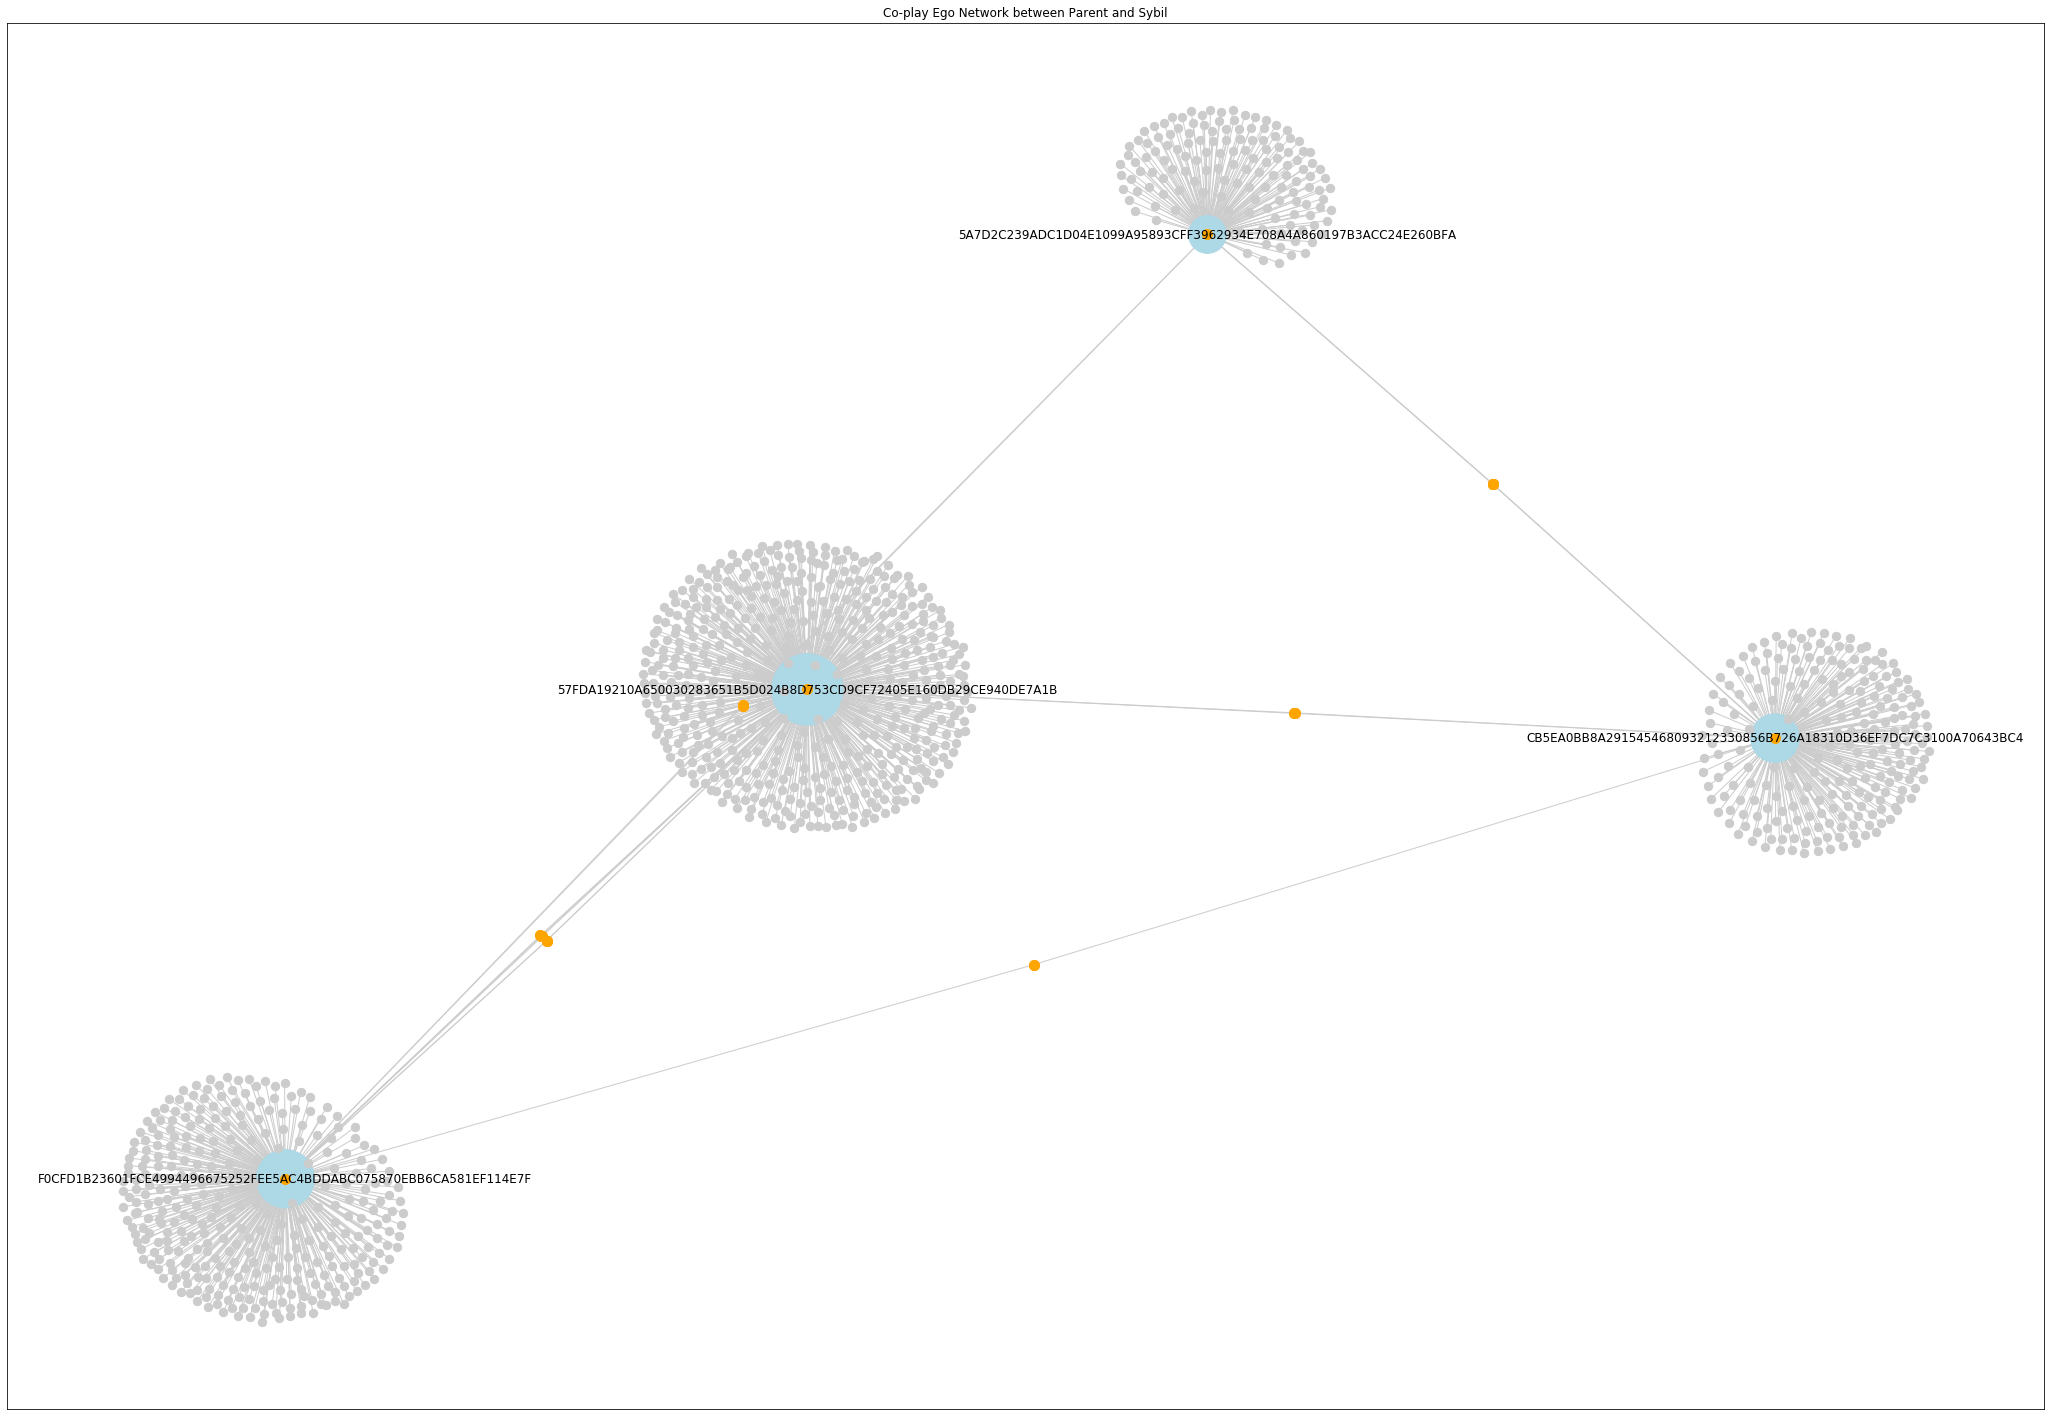

In [17]:
import matplotlib

#new coplay graph based on twink ego n/w
G_coplay = nx.from_pandas_edgelist(new_coplay,'SPA1','SPA2')
layout = nx.spring_layout(G_coplay,iterations=50)

# All edges are thin and grey.
# All connected game players are small and grey.
# 4 Ego network players are sized according to their number of connections.
# 4 Ego network players are blue.
# Players who are common between ego networks are a highlighted color.

# Go through all 4 ego network player IDs, ask the graph how many 
# connections it has(degree). Multiply that by 10 to get the circle size.
some_values_size = [G_coplay.degree(some) * 10 for some in some_values]
nx.draw_networkx_nodes(G_coplay, 
                       layout, 
                       nodelist=some_values, 
                       node_size=some_values_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all the game players
nx.draw_networkx_nodes(G_coplay, layout, nodelist=nodes_coplay, node_color='#cccccc', node_size=70)

# Draw common co-players between the networks
popular_people = [person for person in nodes_coplay if G_coplay.degree(person) > 1]
nx.draw_networkx_nodes(G_coplay, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(G_coplay, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(some_values, some_values))
nx.draw_networkx_labels(G_coplay, layout, labels=node_labels)

plt.title("Co-play Ego Network between Parent and Sybil")

# 5. Tell matplotlib to show it
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(36.5, 25.5,forward=True)

plt.show()